In [2]:
!pip install scikit-image

     |████████████████████████████████| 12.4 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 324 kB/s eta 0:00:01


In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
annFile="/home/razer/Desktop/Hand-Detection/Hand Data Format /Hand Skeleton/Annotations/CMU2020_test.json"
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
hand

COCO supercategories: 
body


{'id': 1138, 'width': 512, 'height': 512, 'file_name': '00014321_512.jpg', 'license': 1, 'flickr_url': '', 'coco_url': '', 'date_captured': '14/6/2020'}


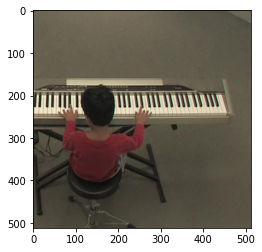

In [12]:
catIds = coco.getCatIds(catNms=['hand']);
imgIds = coco.getImgIds(catIds=catIds);

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)
I = io.imread('/home/razer/Desktop/hand143_panopticdb/test2017/%s'%(img['file_name']))
plt.figure()
plt.imshow(I)

In [13]:
# load and display instance annotations
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
print(anns)

[{'id': 1138, 'image_id': 1138, 'category_id': 1, 'segmentation': [[]], 'area': 262144, 'bbox': [217.00499999999988, 211.17600000000004, 512, 512], 'iscrowd': 0}]


In [14]:
anns[0]

{'id': 1138,
 'image_id': 1138,
 'category_id': 1,
 'segmentation': [[]],
 'area': 262144,
 'bbox': [217.00499999999988, 211.17600000000004, 512, 512],
 'iscrowd': 0}

Populating the interactive namespace from numpy and matplotlib


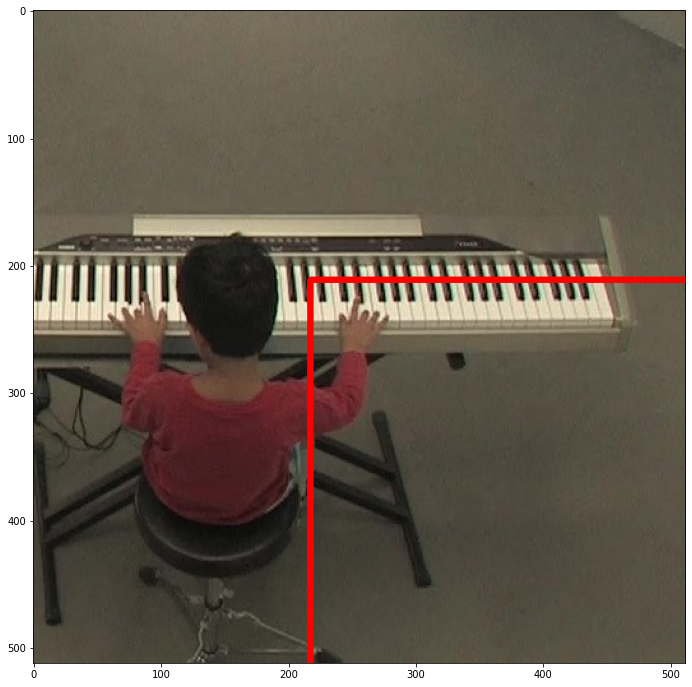

In [15]:
%pylab inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_min, y_min, w, h = anns[0]['bbox']

x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
cv2.rectangle(I, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=(255, 0, 0), thickness =4)
plt.figure(figsize=(12, 12))
plt.imshow(I)
